# Algorithmic Data Science Project 213886

## Introduction and document construction

In this notebook I aim to investigate the time complexity of various algorithms that aim to find the similarities between documents consisting of random words using a bag-of-words representation. We will mainly be working with the Jaccard and Cosine similarity measures.

First we are going to import our text document populated by our 2000 random words that were generated online.

In [1]:
import pandas as pd
import numpy as np 
file = "example_words.txt"
with open(file) as file:
    file = file.read().replace("."," ") #Removing full stops at the end of words as not using tokenise.
    
file = file.split()
len(file)

2000

We will now split up the 2000 words into 20 lists (documents) of 100 words each. We then use the frequency_dict function to generate our list_of_dicts, a list populated by 20 dictionaries with our random words and their corresponding frequencies.

In [2]:
wordlist = [file[x:x+100] for x in range(0, len(file), 100)] #Splitting up our 2000 words.

def frequency(word_list):
    dict_1={}
    for word in word_list:
        if word in dict_1:
            dict_1[word]+=1
        else:
            dict_1[word]=1
    return dict_1

list_of_dicts=[]
for chunk in wordlist:
    list_of_dicts.append(frequency(chunk))
#These lines of code generate a dictionary for each document with the words as the keys and the frequency of the word in each
#document as the values.
print(list_of_dicts[0])
#This gives a sparse representation


{'Adieus': 1, 'except': 1, 'say': 1, 'barton': 1, 'put': 1, 'feebly': 1, 'favour': 1, 'him': 2, 'Entreaties': 1, 'unpleasant': 1, 'sufficient': 1, 'few': 2, 'pianoforte': 1, 'discovered': 1, 'uncommonly': 1, 'ask': 1, 'Morning': 1, 'cousins': 1, 'amongst': 1, 'in': 1, 'mr': 1, 'weather': 1, 'do': 1, 'neither': 1, 'Warmth': 1, 'object': 1, 'matter': 1, 'course': 1, 'active': 2, 'law': 1, 'spring': 1, 'six': 2, 'Pursuit': 1, 'showing': 1, 'tedious': 1, 'unknown': 1, 'winding': 1, 'see': 1, 'had': 2, 'man': 1, 'add': 3, 'And': 1, 'park': 1, 'eyes': 1, 'too': 1, 'more': 1, 'Simple': 1, 'excuse': 2, 'son': 1, 'wholly': 1, 'coming': 1, 'number': 1, 'Though': 1, 'all': 1, 'ladies': 1, 'rather': 1, 'regard': 1, 'assure': 1, 'yet': 1, 'If': 1, 'feelings': 1, 'so': 1, 'prospect': 1, 'no': 1, 'as': 1, 'raptures': 1, 'quitting': 1, 'Betrayed': 1, 'cheerful': 1, 'declared': 1, 'end': 1, 'and': 1, 'Questions': 1, 'we': 1, 'additions': 1, 'is': 1, 'extremely': 1, 'incommode': 1, 'Next': 1, 'half': 1,

# Q1) Jaccard Similarity measure

We are now going to try and find the worst case running time of the Jaccard similarity algorithm. We aim to find the time complexity of the algorithm, as well as the constant corresponding to this.

The formula for the Jaccard measure is:

$J(A,B) = {{|A \cap B|}\over{|A \cup B|}} = {{|A \cap B|}\over{|A| + |B| - |A \cap B|}}$

Where $A \cap B$ is the our intersection defined below and $|A| + |B| - |A \cap B|$ is the union.

The Jaccard measure is a statistic used in understanding the similarities between sample sets, or in our case, the similarities between documents represented as bag-of-words.

### Producing a function that computes Jaccard similarity between two documents

In [3]:
def maketotal(dict1):
    total=0 #This function allows us to calculate the total number of appearances in each document for each word.
    for item in dict1:
        total += dict1[item]
    return total

def jaccard(dict1,dict2):
    intersection={}
    for item in dict1.keys(): #Loop over all keys in the document, increasing time complexity. 
        if item in dict2.keys():
            intersection[item]=min(dict1[item],dict2[item])
            
    intersectiontot=maketotal(intersection) #Finding the total number of intersected words and their frequencies.
    union = maketotal(dict1)+maketotal(dict2)-intersectiontot
    return intersectiontot/union

jaccard(list_of_dicts[0], list_of_dicts[1]) #Calculating the similarity between our first 2 documents.

0.04712041884816754

From inspecting the jaccard function above, I predict that the time complexity of this algorithm is $O(n)$ where $n$ is the length of dict1. This is mainly due to the fact that there is a for loop over dict1, meaning that every value in dict1 must be looked over by the computer during the algorithms run time.

We now construct our timeit function with the use of the time module. This will allow us to record the run-time of the algorithms that we will be using throughout this project.

In [4]:
import time
def timeit(somefunc,*args,repeats=1000,**kwargs):
    times=[]
  
    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1
    
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(len(times)**0.5)
 
    return ans, mean, error

We now create a function named collate. This function automatically increasingly collates our documents, returning a large list of lists (collated_dicts) that contain increasingly larger pairs of dictionaries that are made up of our documents. For example, the first list contains a dictionary populated by our first document and another dictionary populated by our last document. The second list then contains a dictionary of the first and second documents and another dictionary of the second last and last document. This process is repeated up until the last list which contains a dictionary populated by the first ten documents and another dictionary containing the last ten documents. 

The motivaiton for producing this function is so that we can test how long it takes our following algorithms to perform as their inputs increases. This is also known as testing the worst case running time for a certain algorithm.

### Manipulating our documents to be of increasing size

In [5]:
import matplotlib.pyplot as plt 
def collate(dicts):
    x = [] #Start with an empty list
    temp = dicts[0]
    temp2 = dicts[19]
    x.append([temp, temp2])
    for i in range(1,10): #Loop over 10 times so that our last list consists of two dictionaries each containing 10 documents.
        temp = {**temp, **dicts[i]} #This operation collates dictionaries directly.
        temp2 = {**temp2, **dicts[19-i]}
        a = [temp,temp2]
        x.append(a)
    return x   
collated_dicts = collate(list_of_dicts)
print(collated_dicts[0])

[{'Adieus': 1, 'except': 1, 'say': 1, 'barton': 1, 'put': 1, 'feebly': 1, 'favour': 1, 'him': 2, 'Entreaties': 1, 'unpleasant': 1, 'sufficient': 1, 'few': 2, 'pianoforte': 1, 'discovered': 1, 'uncommonly': 1, 'ask': 1, 'Morning': 1, 'cousins': 1, 'amongst': 1, 'in': 1, 'mr': 1, 'weather': 1, 'do': 1, 'neither': 1, 'Warmth': 1, 'object': 1, 'matter': 1, 'course': 1, 'active': 2, 'law': 1, 'spring': 1, 'six': 2, 'Pursuit': 1, 'showing': 1, 'tedious': 1, 'unknown': 1, 'winding': 1, 'see': 1, 'had': 2, 'man': 1, 'add': 3, 'And': 1, 'park': 1, 'eyes': 1, 'too': 1, 'more': 1, 'Simple': 1, 'excuse': 2, 'son': 1, 'wholly': 1, 'coming': 1, 'number': 1, 'Though': 1, 'all': 1, 'ladies': 1, 'rather': 1, 'regard': 1, 'assure': 1, 'yet': 1, 'If': 1, 'feelings': 1, 'so': 1, 'prospect': 1, 'no': 1, 'as': 1, 'raptures': 1, 'quitting': 1, 'Betrayed': 1, 'cheerful': 1, 'declared': 1, 'end': 1, 'and': 1, 'Questions': 1, 'we': 1, 'additions': 1, 'is': 1, 'extremely': 1, 'incommode': 1, 'Next': 1, 'half': 1

Now we are going to use our collated_dicts list to see how the time it takes for the Jaccard measure to run increases with the number of words (in the form of documents) that it takes as input. 

### Computing Jaccard similarity and finding worst-case running time

Times: 
[4.099917411804199e-05, 8.197045326232911e-05, 0.00011205482482910157, 0.00015900039672851562, 0.0001899263858795166, 0.00021600031852722168, 0.00026901769638061526, 0.00030000519752502444, 0.00033299899101257326, 0.00036300468444824217]


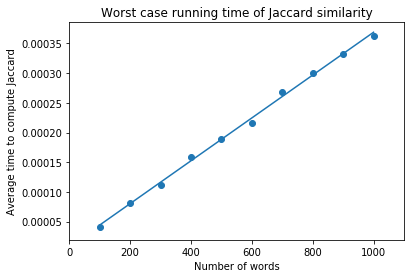

In [6]:
x_values = []
for n in range(100,1100,100):
    x_values.append(n) #This for loop produces our x-axis which is the number of words in each collated document.

y_values = []
for i in range(0,10):
    first = collated_dicts[i][0]
    second = collated_dicts[i][1]
    (ans, mean,error) = timeit(jaccard, first, second) #Taking the Jaccard between two increasingly large values.
    y_values.append(mean)
    
print("Times: \n{}".format(y_values))

z = np.polyfit(x_values, y_values, 1)
p = np.poly1d(z) #Plotting a linear regression on top of our scatter graph for aesthetic reasons.
plt.plot(x_values, p(x_values))


plt.scatter(x_values, y_values)
plt.xlim(0,1100)
plt.xlabel("Number of words") #Plotting our produced values.
plt.ylabel("Average time to compute Jaccard")
plt.title("Worst case running time of Jaccard similarity")
plt.show()

### Estimating the time complexity of the Jaccard measure

It is clear that there seems to be a very linear relationship between the number of words that the Jaccard algorithm has to calculate the similarity between (in their respective documents) and the time it takes to do so. This result supports our previous claim that the Jaccard algorithm runs in $O(n)$.

We now verify this claim emperically by taking $y = c_ax^n$. We can manipulate this equation with logarithms to produce:

$log(y) = log(c_a) + nlog(x)$. If we plot $log(y)$ against $log(x)$, the gradient will give the $n$ value which we hope will be 1. The y intercept will also be $log(c_a)$. The logarithms we take are in base 10 so we can then take 10 to the power of our produced intercept value to give us our $c_a$ value.

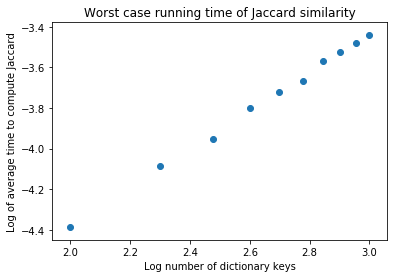

Intercept: -6.282100742619131, Slope: 0.9488252240825855
C_a: 5.222750236170996e-07


In [7]:
logxs=[np.log10(x) for x in x_values] #Taking the log of both our x and y values in their respective lists.
logys=[np.log10(y) for y in y_values]
plt.scatter(logxs,logys)
plt.xlabel("Log number of dictionary keys")
plt.ylabel("Log of average time to compute Jaccard")
plt.title("Worst case running time of Jaccard similarity")
plt.show()
slope, intercept = np.polyfit(logxs, logys, 1)
print("Intercept: {}, Slope: {}".format(intercept, slope))
constant = 10**intercept
print("C_a: {}".format(constant))

Our slope ranges from around 0.9-1.0, meaning that $n$ is close to our predicted value of 1, a completely linear relationship. Our constant is also very small as expected.

# Q2) Cosine similarity measure (dense representation)

We now aim to do the same for the cosine similarity measure. The cosine similarity is a more geometric approach to computing similarity measures when compared to the Jaccard implementation. This is because the cosine of the angle between the two inputs is computed. The formula for the cosine similarity is:

${\displaystyle {\text{similarity}}=\cos(\theta )={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}},}$

To start computing this, we need to first produce a characteristic matrix that corresponds to our input, which in this case will be our large list of lists named list_of_dicts. We then transpose this matrix to produce our vectors A and B which then be fed into the cosine function below.

### Producing the cosine function

In [8]:
import math
def make_matrix(list_of_dicts):
    allfeatures={}    
    for docdict in list_of_dicts:
        for feat in docdict.keys():
            allfeatures[feat]=1
    
    dimensions=list(allfeatures.keys())
    #Sorting for reproducibility
    sorted(dimensions)
    
    matrix=[]
    #each row in the matrix correlates to a dimension
    for dimension in dimensions:
        row=[]
        for docdict in list_of_dicts:
            row.append(docdict.get(dimension,0)) #Append the document's value if present, 0 otherwise
        matrix.append(row)
        
        
    return matrix

In [9]:
def transpose(matrix):
    transposed=[]
    for i in range(0,len(matrix[0])):
        transposed.append([row[i] for row in matrix])
        
    return transposed

def dot(v1,v2):
    total=0
    for i in range(0,len(v1)):
        total+=v1[i]*v2[i]
        
    return total

def cosine(v1,v2):
    
    return dot(v1,v2)/math.sqrt(dot(v1,v1)*dot(v2,v2))

amatrix=make_matrix(list_of_dicts) #We first produce the characteristic matrix.
print("Characteristic matrix of our documents:")
print(amatrix)
print("\n")
print("Transpose characteristic matrix:")
vectors=transpose(amatrix) #Transpose this matrix to produce the vectors we need.


Characteristic matrix of our documents:
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 2

In [10]:
print(vectors[0])

[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
c = cosine(vectors[0], vectors[1])
print("The cosine (dense) similarity for document 1 and document 2 is: {}".format(c))

The cosine (dense) similarity for document 1 and document 2 is: 0.10338319495321828


We are now going to use a similar method to what we did previously when finding the complexity of the Jaccard algorithm but using our characteristic matrix in dense representation. Note that we will be using the collated_dicts that we produced earlier using the collate function again. 

### Computing Cosine (dense) similarity and finding worst-case running time

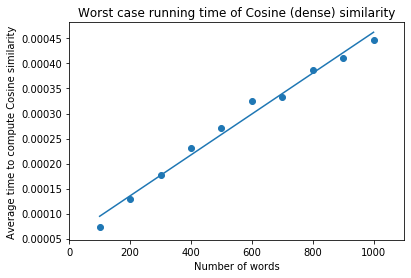

Times: 
[7.300019264221191e-05, 0.00012900161743164063, 0.00017706847190856933, 0.00023199033737182617, 0.00027200722694396975, 0.00032494616508483887, 0.00033299922943115235, 0.0003859996795654297, 0.0004110002517700195, 0.0004470257759094238]


In [12]:
y_values_2 = []
for i in range(0,10):
    dense_r = make_matrix(collated_dicts[i]) #Making large characteristic matrices
    transpose_dense = transpose(dense_r) #Transposing these matrices
    v1 = transpose_dense[0]  
    v2 = transpose_dense[1]
    (ans, mean,error) = timeit(cosine, v1, v2) #Timing how long it takes to compute the cosine similarity between vectors v1, v2.
    y_values_2.append(mean)

z = np.polyfit(x_values, y_values_2, 1)
p = np.poly1d(z)
plt.plot(x_values, p(x_values))
plt.scatter(x_values, y_values_2)
plt.xlim(0,1100)
plt.xlabel("Number of words")
plt.ylabel("Average time to compute Cosine similarity")
plt.title("Worst case running time of Cosine (dense) similarity")
plt.show()
print("Times: \n{}".format(y_values_2))

### Estimating the time complexity of Cosine (dense) implementation

As you can see, the Jaccard and Cosine similarity measures have very similar plots lines of best fit. We will explore this further below in the same way as before whereby we claim that our time complexity is also of the form $O(n)$.

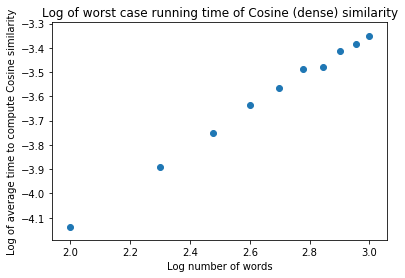

Intercept: -5.700344076345459, Slope: 0.7873024966476683
C_b: 1.99368216437511e-06


In [13]:
logxs=[np.log10(x) for x in x_values]
logys=[np.log10(y) for y in y_values_2]
plt.scatter(logxs,logys)
plt.xlabel("Log number of words")
plt.ylabel("Log of average time to compute Cosine similarity")
plt.title("Log of worst case running time of Cosine (dense) similarity")
plt.show()
slope, intercept = np.polyfit(logxs, logys, 1) #Using polyfit to produce the slope and intercept, can also use lineregress
print("Intercept: {}, Slope: {}".format(intercept, slope))
constant = 10**intercept
print("C_b: {}".format(constant))

Our slope ranges from around 0.8-0.9, which is lower than the slope produced by the Jaccard implementation. This is odd considering the run-times ten to be higher for this measure than Jaccard. To investigate this further, I will test the possibility of the Cosine dense implementation running in $O(nlog(n))$ rather than in $O(n)$ that I previously assumed. 

This gives $y = c_bnlog(n)$. To test this, we will make a transformation. We will let $x = nlog(n)$. Plotting $y$ against $x$ gives $y/x$ = $c_b$ and so this will hopefully gives us a completely straight line where the intercept is approximately 0, and the gradient is our new constant, $c_b$.

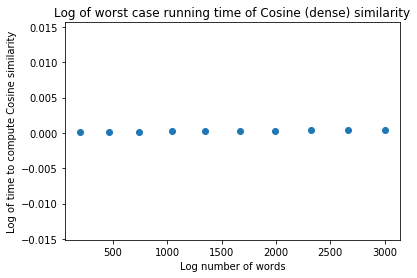

Intercept: 7.819216742093854e-05, Slope(c_b): 1.297910469490689e-07
Times: [7.300019264221191e-05, 0.00012900161743164063, 0.00017706847190856933, 0.00023199033737182617, 0.00027200722694396975, 0.00032494616508483887, 0.00033299922943115235, 0.0003859996795654297, 0.0004110002517700195, 0.0004470257759094238]


In [14]:
import scipy.stats as stats
xslogxs=[x*np.log10(x) for x in x_values] #Transforming our x-values to a xlog(x) format.
plt.scatter(xslogxs,y_values_2) #Plotting x=nlog(n) against our generated times.
plt.xlabel("Log number of words")
plt.ylabel("Log of time to compute Cosine similarity")
plt.title("Log of worst case running time of Cosine (dense) similarity")
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(xslogxs, y_values_2)
print("Intercept: {}, Slope(c_b): {}".format(intercept, slope))
print("Times: {}".format(y_values_2))

We can see that our intercept is close to 0 and our slope is very small as we would expect (as our constant should be small). This supports the idea that the time complexity of this implementation is actually $O(nlog(n))$ rather than $O(n)$.

### Finding the worst-case running time of Cosine similarity when using numpy.dot instead of our dot function.

We will now use numpy's version of the dot product instead of our previously made dot product function. This is to see the difference in complexity of the cosine algorithm when using different implementations. We of course use the same format as before to produce the following scatter, relying on our very useful collated_dicts.

Cosine similarity example using numpy.dot: 0.10338319495321828


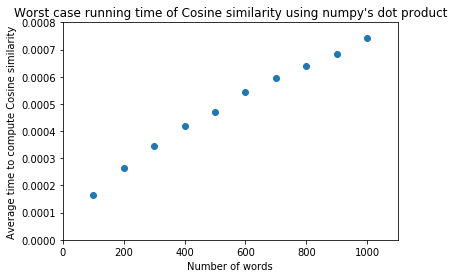

y values corresponding the numpy.dot implementation of cosine similarity:
 [0.00016599369049072264, 0.0002649998664855957, 0.00034605908393859865, 0.0004179995059967041, 0.0004710533618927002, 0.0005439903736114502, 0.0005959458351135254, 0.0006400077342987061, 0.0006849939823150634, 0.0007440609931945801]


In [15]:
def numpycosine(v1,v2):
    #Modifying the original cosine function to use numpy.dot instead of our previously made dot function.
    return np.dot(v1,v2)/math.sqrt(np.dot(v1,v1)*np.dot(v2,v2))

print("Cosine similarity example using numpy.dot: {}".format(numpycosine(vectors[0], vectors[1]))) #Checking that this implementation gives same value as before.

y_values_3 = []
for i in range(0,10):
    dense_r = make_matrix(collated_dicts[i]) #Using the same method as before
    trans_dense = transpose(dense_r)
    v1 = trans_dense[0]
    v2 = trans_dense[1]
    (ans, mean,error) = timeit(numpycosine, v1, v2)
    y_values_3.append(mean)
    

plt.scatter(x_values, y_values_3)
plt.xlim(0,1100)
plt.ylim(0,0.0008)
plt.xlabel("Number of words")
plt.ylabel("Average time to compute Cosine similarity")
plt.title("Worst case running time of Cosine similarity using numpy's dot product")
plt.show()
print("y values corresponding the numpy.dot implementation of cosine similarity:\n {}".format(y_values_3))

### Estimating the time complexity of Cosine (dense) implementation using numpy.dot

The line is much steeper than it previously was when using the cosine similarity using our own dot product function. Like the dense Cosine measure previously, I believe the time-complexity for this method is also of the form $O(nlog(n)$).

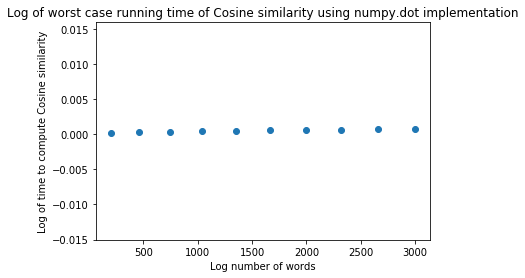

Intercept: 0.00018396736481659717, Slope(c_c): 1.9667931773807928e-07
Times: [0.00016599369049072264, 0.0002649998664855957, 0.00034605908393859865, 0.0004179995059967041, 0.0004710533618927002, 0.0005439903736114502, 0.0005959458351135254, 0.0006400077342987061, 0.0006849939823150634, 0.0007440609931945801]


In [16]:
import scipy.stats as stats
xslogxs=[x*np.log10(x) for x in x_values]
plt.scatter(xslogxs,y_values_3)
plt.xlabel("Log number of words")
plt.ylabel("Log of time to compute Cosine similarity")
plt.title("Log of worst case running time of Cosine similarity using numpy.dot implementation")
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(xslogxs, y_values_3)
print("Intercept: {}, Slope(c_c): {}".format(intercept, slope))
print("Times: {}".format(y_values_3))

This graph produced the results that was expected, meaning it is sufficent enough to say that the time complexity of the cosine similiarty algorithm using numpy.dot product implementation is of the form $O(nlog(n))$.

# Q3) Cosine similarity measure (sparse representation)

### Producing a function that computes Cosine similarity for sparse inputs.

We are now going to compute the cosine similarity measure again, but this time from dictionary representations rather than into vector representations like we did in the previous question. We create a function cosine_dict which will compute the cosine similarity and then use our established collated_dicts once more. 

In [17]:
def cosine_dict(dict1,dict2):
    intersection = 0
    a = 0 #Initializing variables at 0 to keep a running score.
    b = 0
    for key,value in dict1.items():
        intersection += value*dict2.get(key,0.0) #Search for each individual key. If it finds it, returns the frequency
        #of the word. If not, assume 0.
        a += value*value
    for value in dict2.values():
        b += value*value
    return intersection/math.sqrt(a*b)

c = cosine_dict(list_of_dicts[0], list_of_dicts[1])
print("The Cosine (sparse) similarity for document 1 and 2 is: {}".format(c))
#Checking that the implementation 
#gives the same cosine similarity as before.

The Cosine (sparse) similarity for document 1 and 2 is: 0.10338319495321828


### Finding the worst-case running time of Cosine (sparse) similarity 

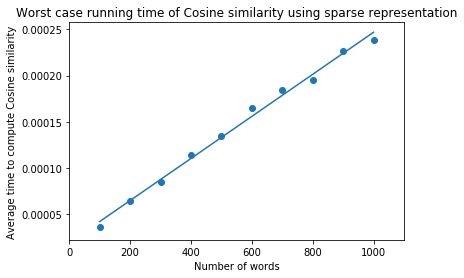

Times: [3.600072860717773e-05, 6.401729583740234e-05, 8.498716354370117e-05, 0.0001139979362487793, 0.00013500118255615234, 0.00016500020027160645, 0.00018399906158447267, 0.00019500088691711426, 0.00022706198692321776, 0.0002389988899230957]


In [18]:
y_values_4 = []
for i in range(0,10):
    first_doc = collated_dicts[i][0] #Looping over each pair of dictionaries, picking out the first and second ones individually
    #and computing the cosine similarity between them.
    second_doc = collated_dicts[i][1]
    (ans, mean,error) = timeit(cosine_dict, first_doc, second_doc)
    y_values_4.append(mean)
    
z = np.polyfit(x_values, y_values_4, 1)
p = np.poly1d(z)
plt.plot(x_values, p(x_values))
plt.scatter(x_values, y_values_4)
plt.xlim(0,1100)
plt.xlabel("Number of words")
plt.ylabel("Average time to compute Cosine similarity")
plt.title("Worst case running time of Cosine similarity using sparse representation")
plt.show()
print("Times: {}".format(y_values_4))

It's clear to see that the sparse representation of cosine similarity produces a linear graph. However, it is not as steep as the graphs produced when using the dense and numpy representations. 

It also has a faster run-time than the Jaccard measure so seems to be the best method when using large documents. We now investigate its time complexity. I predict that its time complexity is of the form $O(n)$, like Jaccard. We test that now.

### Estimating the time complexity of Cosine (sparse) implementation

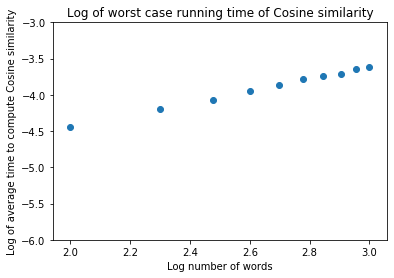

Intercept: -6.113574939843969, Slope: 0.8329073895385423
C_d: 7.6988358534936e-07


In [19]:
logxs=[np.log10(x) for x in x_values]
logys=[np.log10(y) for y in y_values_4]
plt.scatter(logxs,logys)
plt.ylim(-6,-3)
plt.xlabel("Log number of words")
plt.ylabel("Log of average time to compute Cosine similarity")
plt.title("Log of worst case running time of Cosine similarity")
plt.show()
slope, intercept = np.polyfit(logxs, logys, 1)
print("Intercept: {}, Slope: {}".format(intercept, slope))
constant = 10**intercept
print("C_d: {}".format(constant))

This method produces a lower slope than the Cosine with dense representation, the numpy equivalent and the Jaccard method, so seems to be the fastest implementation out of the four we have tested, with a lower time complexity.

We now plot all of the methods together so that comparison can easily be made between them.

(0, 0.0005)

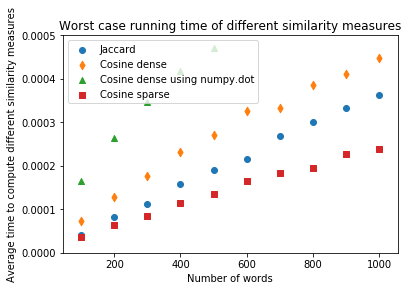

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_values, y_values, label = "Jaccard", marker = "o")
ax1.scatter(x_values, y_values_2, label = "Cosine dense", marker = "d")
ax1.scatter(x_values, y_values_3, label = "Cosine dense using numpy.dot", marker = "^")
ax1.scatter(x_values, y_values_4, label = "Cosine sparse", marker = "s")
plt.legend(loc="upper left")
plt.xlabel("Number of words")
plt.ylabel("Average time to compute different similarity measures")
plt.title("Worst case running time of different similarity measures")
plt.ylim(0,0.0005)
#Depending on the setup of the reader, this graph might look very different. Hence feel free to change the y limit above.

From this we can directly see that cosine sparse is the implementation that would be preferred if using large documents.

# Q4) All pairs similarities

### Creating a function to compute all-pairs similarity for each method

We now aim to compute the similarity between all-pairs of documents for each measure. We create the similarity function below, whereby it produces a large output of all the possible similarities between each document.

In [21]:
def similarity(listofdicts, measure):
    if measure == jaccard:
        for i in range(len(listofdicts)): #Looping over the number of documents provided, will work for any number of documents.
            for j in range(len(listofdicts)):
                if (i!=j): #Prevents similarity being computed between the same documents (gives a useless output of 1).
                    js = jaccard(listofdicts[i],listofdicts[j])
                    txt = "The J.S for document {a} and document {b} is {c}"
                    print(txt.format(a=i,b=j,c=js))
    elif measure == cosine:
        tempmatrix = make_matrix(listofdicts)
        vector = transpose(tempmatrix)
        for i in range(len(vector)):
            for j in range(len(vector)):
                if (i!=j):
                    cos = cosine(vector[i], vector[j])
                    txt = "The Cosine Similiarity (dense representation) for document {a} and document {b} is {c}"
                    print(txt.format(a=i,b=j,c=cos))
    elif measure == numpycosine:
        tempmatrix = make_matrix(listofdicts)
        vector = transpose(tempmatrix)
        for i in range(len(vector)):
            for j in range(len(vector)):
                if (i!=j):
                    cos = numpycosine(vector[i], vector[j])
                    txt = "The Cosine Similarity (using np.dot) for document {a} and document {b} is {c}"
                    print(txt.format(a=i, b=j, c=cos))
    elif measure == cosine_dict:
        for i in range(len(listofdicts)):
            for j in range(len(listofdicts)):
                if (i!=j):
                    cos = cosine_dict(listofdicts[i],listofdicts[j])
                    txt = "The Cosine Similarity (sparse representation) for document {a} and document {b} is {c}"
                    print(txt.format(a=i,b=j,c=cos))

We can use the above function to calculate the all-pairs similarity for our Jaccard and Cosine (sparse) implementation. I will also print the results for the numpy and cosine (dense) methods to check that all 3 cosine methods give the same answers.

In [22]:
similarity(list_of_dicts, jaccard)

The J.S for document 0 and document 1 is 0.04712041884816754
The J.S for document 0 and document 2 is 0.041666666666666664
The J.S for document 0 and document 3 is 0.05263157894736842
The J.S for document 0 and document 4 is 0.041666666666666664
The J.S for document 0 and document 5 is 0.08108108108108109
The J.S for document 0 and document 6 is 0.06382978723404255
The J.S for document 0 and document 7 is 0.08108108108108109
The J.S for document 0 and document 8 is 0.06382978723404255
The J.S for document 0 and document 9 is 0.08108108108108109
The J.S for document 0 and document 10 is 0.08108108108108109
The J.S for document 0 and document 11 is 0.10497237569060773
The J.S for document 0 and document 12 is 0.06382978723404255
The J.S for document 0 and document 13 is 0.0582010582010582
The J.S for document 0 and document 14 is 0.04712041884816754
The J.S for document 0 and document 15 is 0.0582010582010582
The J.S for document 0 and document 16 is 0.07526881720430108
The J.S for docum

In [23]:
similarity(list_of_dicts, cosine_dict)

The Cosine Similarity (sparse representation) for document 0 and document 1 is 0.10338319495321828
The Cosine Similarity (sparse representation) for document 0 and document 2 is 0.08267004114290563
The Cosine Similarity (sparse representation) for document 0 and document 3 is 0.10496165562976974
The Cosine Similarity (sparse representation) for document 0 and document 4 is 0.10256784899270367
The Cosine Similarity (sparse representation) for document 0 and document 5 is 0.16101694915254236
The Cosine Similarity (sparse representation) for document 0 and document 6 is 0.13335185571076982
The Cosine Similarity (sparse representation) for document 0 and document 7 is 0.16402261043504096
The Cosine Similarity (sparse representation) for document 0 and document 8 is 0.17360708640010183
The Cosine Similarity (sparse representation) for document 0 and document 9 is 0.19014109462868295
The Cosine Similarity (sparse representation) for document 0 and document 10 is 0.1724394251251618
The Cosine

In [24]:
similarity(list_of_dicts, cosine) #Checking that it produces the same values as the sparse cosine method.

The Cosine Similiarity (dense representation) for document 0 and document 1 is 0.10338319495321828
The Cosine Similiarity (dense representation) for document 0 and document 2 is 0.08267004114290563
The Cosine Similiarity (dense representation) for document 0 and document 3 is 0.10496165562976974
The Cosine Similiarity (dense representation) for document 0 and document 4 is 0.10256784899270367
The Cosine Similiarity (dense representation) for document 0 and document 5 is 0.16101694915254236
The Cosine Similiarity (dense representation) for document 0 and document 6 is 0.13335185571076982
The Cosine Similiarity (dense representation) for document 0 and document 7 is 0.16402261043504096
The Cosine Similiarity (dense representation) for document 0 and document 8 is 0.17360708640010183
The Cosine Similiarity (dense representation) for document 0 and document 9 is 0.19014109462868295
The Cosine Similiarity (dense representation) for document 0 and document 10 is 0.1724394251251618
The Cosine

The Cosine Similiarity (dense representation) for document 6 and document 11 is 0.22242542101947535
The Cosine Similiarity (dense representation) for document 6 and document 12 is 0.25204085018888195
The Cosine Similiarity (dense representation) for document 6 and document 13 is 0.19481258303987187
The Cosine Similiarity (dense representation) for document 6 and document 14 is 0.16668981963846227
The Cosine Similiarity (dense representation) for document 6 and document 15 is 0.2583692204396165
The Cosine Similiarity (dense representation) for document 6 and document 16 is 0.3226226123305515
The Cosine Similiarity (dense representation) for document 6 and document 17 is 0.3200056767329887
The Cosine Similiarity (dense representation) for document 6 and document 18 is 0.19854162773425654
The Cosine Similiarity (dense representation) for document 6 and document 19 is 0.26780834840499246
The Cosine Similiarity (dense representation) for document 7 and document 0 is 0.16402261043504096
The 

The Cosine Similiarity (dense representation) for document 12 and document 5 is 0.27281113577158855
The Cosine Similiarity (dense representation) for document 12 and document 6 is 0.25204085018888195
The Cosine Similiarity (dense representation) for document 12 and document 7 is 0.12800409619661848
The Cosine Similiarity (dense representation) for document 12 and document 8 is 0.22580645161290322
The Cosine Similiarity (dense representation) for document 12 and document 9 is 0.18548387096774194
The Cosine Similiarity (dense representation) for document 12 and document 10 is 0.21868051083205892
The Cosine Similiarity (dense representation) for document 12 and document 11 is 0.21213882290691585
The Cosine Similiarity (dense representation) for document 12 and document 13 is 0.17837088669787884
The Cosine Similiarity (dense representation) for document 12 and document 14 is 0.1570730781715207
The Cosine Similiarity (dense representation) for document 12 and document 15 is 0.20667510285726

In [25]:
similarity(list_of_dicts, numpycosine) #Checking that the numpy method also gives the same results.

The Cosine Similarity (using np.dot) for document 0 and document 1 is 0.10338319495321828
The Cosine Similarity (using np.dot) for document 0 and document 2 is 0.08267004114290563
The Cosine Similarity (using np.dot) for document 0 and document 3 is 0.10496165562976974
The Cosine Similarity (using np.dot) for document 0 and document 4 is 0.10256784899270367
The Cosine Similarity (using np.dot) for document 0 and document 5 is 0.16101694915254236
The Cosine Similarity (using np.dot) for document 0 and document 6 is 0.13335185571076982
The Cosine Similarity (using np.dot) for document 0 and document 7 is 0.16402261043504096
The Cosine Similarity (using np.dot) for document 0 and document 8 is 0.17360708640010183
The Cosine Similarity (using np.dot) for document 0 and document 9 is 0.19014109462868295
The Cosine Similarity (using np.dot) for document 0 and document 10 is 0.1724394251251618
The Cosine Similarity (using np.dot) for document 0 and document 11 is 0.2087667001917663
The Cosine

The Cosine Similarity (using np.dot) for document 6 and document 1 is 0.24245401441701145
The Cosine Similarity (using np.dot) for document 6 and document 2 is 0.21951945016451005
The Cosine Similarity (using np.dot) for document 6 and document 3 is 0.24615581651166007
The Cosine Similarity (using np.dot) for document 6 and document 4 is 0.24377495668791888
The Cosine Similarity (using np.dot) for document 6 and document 5 is 0.33337963927692454
The Cosine Similarity (using np.dot) for document 6 and document 7 is 0.22583582863138607
The Cosine Similarity (using np.dot) for document 6 and document 8 is 0.23578015017669599
The Cosine Similarity (using np.dot) for document 6 and document 9 is 0.13008560009748743
The Cosine Similarity (using np.dot) for document 6 and document 10 is 0.1950273389240886
The Cosine Similarity (using np.dot) for document 6 and document 11 is 0.22242542101947535
The Cosine Similarity (using np.dot) for document 6 and document 12 is 0.25204085018888195
The Cosi

The Cosine Similarity (using np.dot) for document 12 and document 17 is 0.17716157860724777
The Cosine Similarity (using np.dot) for document 12 and document 18 is 0.18837162994395396
The Cosine Similarity (using np.dot) for document 12 and document 19 is 0.10625592962581035
The Cosine Similarity (using np.dot) for document 13 and document 0 is 0.15237459493410543
The Cosine Similarity (using np.dot) for document 13 and document 1 is 0.32172416819495553
The Cosine Similarity (using np.dot) for document 13 and document 2 is 0.22296360837234858
The Cosine Similarity (using np.dot) for document 13 and document 3 is 0.21049893061308372
The Cosine Similarity (using np.dot) for document 13 and document 4 is 0.26126034411427157
The Cosine Similarity (using np.dot) for document 13 and document 5 is 0.20570570316104236
The Cosine Similarity (using np.dot) for document 13 and document 6 is 0.19481258303987187
The Cosine Similarity (using np.dot) for document 13 and document 7 is 0.16957668282812

The Cosine Similarity (using np.dot) for document 17 and document 15 is 0.24214645587440095
The Cosine Similarity (using np.dot) for document 17 and document 16 is 0.32953108137281006
The Cosine Similarity (using np.dot) for document 17 and document 18 is 0.13323604148969134
The Cosine Similarity (using np.dot) for document 17 and document 19 is 0.22230800575069137
The Cosine Similarity (using np.dot) for document 18 and document 0 is 0.1843240263427725
The Cosine Similarity (using np.dot) for document 18 and document 1 is 0.11531327161512436
The Cosine Similarity (using np.dot) for document 18 and document 2 is 0.1541222426814169
The Cosine Similarity (using np.dot) for document 18 and document 3 is 0.1337987216011345
The Cosine Similarity (using np.dot) for document 18 and document 4 is 0.1682008800516714
The Cosine Similarity (using np.dot) for document 18 and document 5 is 0.16676935716727037
The Cosine Similarity (using np.dot) for document 18 and document 6 is 0.19854162773425654

Interestingly, the Cosine similarity for each document pair seems to be around double that of the Jaccard similarity.

### Modifying the similarity function

We now modify our similarity function to take an additional parameter n, which specifies the number of documents to loop over when computing all-pairs. This is so that we can test the time complexity of the all-pairs Jaccard and Cosine (sparse) measures. We have removed the possibility of the measures being inputted as numpycosine and cosine (dense) as we do not wish to find the worst case running time when computing all-pairs similarity for these measures. Reasons are detailed in appendix.

In [26]:
def newsimilarity(listofdicts, measure, n):
    if measure == jaccard:
        for i in range(0,n):
            for j in range(0,n):
                if (i!=j):
                    js = jaccard(listofdicts[i],listofdicts[j])
    elif measure == cosine_dict:
        for i in range(0,n):
            for j in range(0,n):
                if (i!=j):
                    cos = cosine_dict(listofdicts[i],listofdicts[j])   

### Finding the worst case running time of all-pairs Jaccard similarity

We now produce the x-axis which we will use to make plots. It is the number of documents included in the all-pairs computation. 

In [27]:
docs = []
for x in range(2,21):
    docs.append(x)

We now use our timeit function in conjunction with the new similarity function with our desired parameters to produce the worst-case running time.

In [28]:
y_values_5 = []
for n in range(2,21):
    (ans, mean,error) = timeit(newsimilarity, list_of_dicts, jaccard, n)
    y_values_5.append(mean) #Loop produces 20 running times that should increase with every iteration.

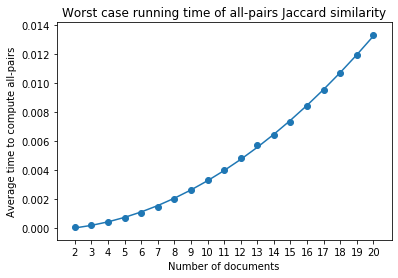

Times: [7.205343246459961e-05, 0.00020194673538208007, 0.00041399812698364257, 0.0007070605754852295, 0.0010409398078918457, 0.0014560515880584716, 0.0020039682388305665, 0.002620032548904419, 0.0033119759559631346, 0.004018003225326538, 0.004843947410583496, 0.005745999097824097, 0.006409053087234497, 0.007304938793182373, 0.008393070459365845, 0.009501933336257935, 0.010698999166488648, 0.011910999774932861, 0.013288000345230103]


In [29]:
z = np.polyfit(docs, y_values_5, 2) #Linear regression helps show that relationship is quadratic.
p = np.poly1d(z)
plt.plot(docs, p(docs))
plt.scatter(docs, y_values_5)
plt.xlabel("Number of documents")
plt.ylabel("Average time to compute all-pairs")
plt.title("Worst case running time of all-pairs Jaccard similarity")
plt.xticks(range(2,21)) #Deafult x-ticks go up in 2.5's, this looks cleaner.
plt.show()
print("Times: {}".format(y_values_5))

We now do the same for our sparse consine implementation.

### Finding the worst case running time of all-pairs Cosine (sparse) similarity

In [30]:
y_values_8 = []
for n in range(2,21):
    (ans, mean,error) = timeit(newsimilarity, list_of_dicts, cosine_dict, n)
    y_values_8.append(mean)

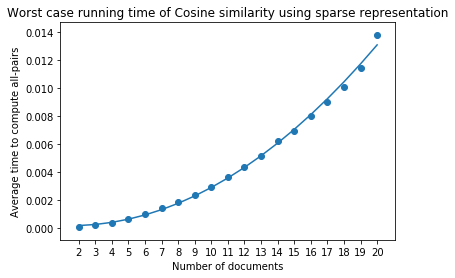

In [31]:
z = np.polyfit(docs, y_values_8, 2)
p = np.poly1d(z)
plt.plot(docs, p(docs))
plt.scatter(docs, y_values_8)
plt.xticks(range(2,21))
plt.xlabel("Number of documents")
plt.ylabel("Average time to compute all-pairs")
plt.title("Worst case running time of Cosine similarity using sparse representation")
plt.show()

Text(0.5, 1.0, 'Worst case running time of different similarity measures')

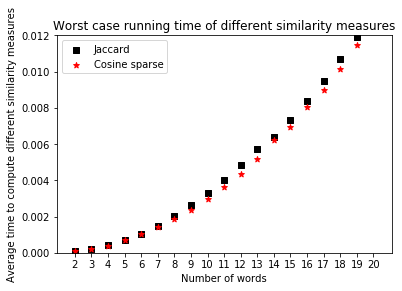

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(docs, y_values_5, label = "Jaccard", marker = "s", c = "k")
ax1.scatter(docs, y_values_8, label = "Cosine sparse", marker = "*", c ="r")
plt.ylim(0,0.012) #Change the limits as required if the plot does not fit well.
plt.legend(loc="upper left")
plt.xticks(range(2,21))
plt.xlabel("Number of words")
plt.ylabel("Average time to compute different similarity measures")
plt.title("Worst case running time of different similarity measures")

### Estimating the time complexities of all-pairs measures

From each of the graphs above, It is clear to see that their relationships are quadratic. 

Once again, we will use logarithms to manipulate our plots to find the respective time complexities in big-O notation.

If $y=c.x^n$ then it follows that:
$$\log(y) = \log(c) + n \log(x)$$
so if we plot a graph of $\log(y)$ against $\log(x)$ the gradient will be $n$ which we hope to be ~2 and the y intercept will be $\log(c)$

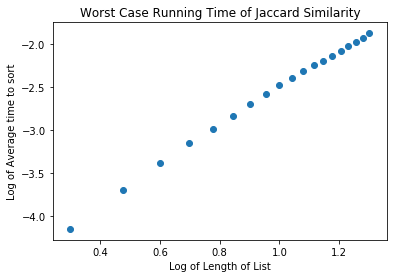

Slope for J.S is 2.2253681153324254 and intercept is -4.737694334106675
Constant for J.S is 1.8293873256930996e-05


In [33]:
logxs=[np.log10(x) for x in docs]
logys=[np.log10(y) for y in y_values_5]

plt.scatter(logxs,logys)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to sort")
plt.title("Worst Case Running Time of Jaccard Similarity")
plt.show()
slope1, intercept1 = np.polyfit(logxs, logys, 1)
print("Slope for J.S is {} and intercept is {}".format(slope1,intercept1))
constant1 = 10**intercept1 #Working in log base 10, meaning if we take 10 to the power of the intercept, we obtain the constant.
print("Constant for J.S is {}".format(constant1))

The slope produced is usually around 2-2.4, but I will go with $n = 2.249$ which is the current result at the time I am writing this.
This shows that empirically that the time compelxity in big-O notation is $O(n^{2.249})$ for our all-pairs Jaccard measure. Originally I decided to go with 2.2 but when computing a huge amount of documents (e.g 200k) it is better to be more accurate.

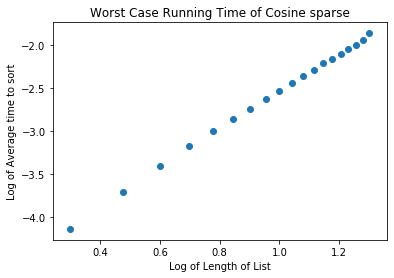

Slope for Cosine sparse is 2.2069431998330353 and intercept is -4.74173983513668
Constant for Cosine sparse is 1.8124255041229395e-05


In [34]:
logxs=[np.log10(x) for x in docs]
logys=[np.log10(y) for y in y_values_8]

plt.scatter(logxs,logys)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to sort")
plt.title("Worst Case Running Time of Cosine sparse")
plt.show()
slope2, intercept2 = np.polyfit(logxs, logys, 1)
print("Slope for Cosine sparse is {} and intercept is {}".format(slope2,intercept2))
constant2 = 10**intercept2
print("Constant for Cosine sparse is {}".format(constant2))

The slope produced above seems to be around 2.2 also, suggesting that in big-O notation the time complexity is of the form $O(n^{2.2})$ for the Cosine sparse method.

Now that we have the time complexity of each all-pairs measure, we can aim to compute how long each algorithm takes for a certain number of documents. Converting from big-O notation and inputing our values, $y_1 = c_1*20^{slope}$ and $y_2 = c_2*20^{slope}$. Keep in my mind that these constants may vary depending on the setup of the reader.


In [35]:
y = constant1*(20**slope1)
x = constant2*(20**slope2)
print("Estimated time taken to compute all-pairs Jaccard and Cosine sparse measures for 20 documents respectively: {} {}".format(x,y))

Estimated time taken to compute all-pairs Jaccard and Cosine sparse measures for 20 documents respectively: 0.013475952346743673 0.014373956801866488


Therefore, to test if our estimated complexity is correct, these values should correspond to our previously generated times. 

In [36]:
y_1 = y_values_5[18]
y_2 = y_values_8[18]
print("True time taken to compute all-pairs Jaccard and Cosine sparse measures for 20 documents respectively: {} {}".format(y_1, y_2))


True time taken to compute all-pairs Jaccard and Cosine sparse measures for 20 documents respectively: 0.013288000345230103 0.013808066606521606


Our estimated and true times for 20 documents is very close meaning that we can assume our estimated time complexity is close to the true value. We now try this for 200k documents. We will use our previous constants $c_1$ and $c_2$ and our generated slopes. We divide by 86400 as this is the amount of seconds in a day. 

In [37]:
y_3 = constant1*(200000**slope1)
y_4 = constant2*(200000**slope2)
print("Estimated time taken to compute all-pairs Jaccard similarity for 200k documents in days: {}".format(y_3 / 86400))
print("Estimated time taken to compute all-pairs Cosine similarity for 200k documents in days: {}".format(y_4 / 86400))

Estimated time taken to compute all-pairs Jaccard similarity for 200k documents in days: 132.5974139769915
Estimated time taken to compute all-pairs Cosine similarity for 200k documents in days: 104.91039529570156


The results above tend to show that the Cosine sparse similarity should be preferred when using a huge amount of doucments.

# Q5) Map-reduce

MapReduce is a programming model and an associated parallel implementation for processing large data sets. A MapReduce program is composed of a map method which sorts and filters and a reduce method that then sums across the outputs of the map stage. 


A MapReduce system is usually composed of three operations:

Map: Each worker node applies the map function and writes the output to a temporary storage. A master node ensures that only one copy of the data is processed.

Shuffle: Worker nodes redistribute data based on the output keys (produced by the map function).

Reduce: Worker nodes now process each group of output data in parallel.

In [38]:
from multiprocessing import Pool
from collections import defaultdict

def map_reduce_parallel(inputs,mapper,reducer,mapprocesses=3,reduceprocesses=2):
    
    collector=defaultdict(list)  #this dictionary is where we will store intermediate results
                                 #it will map keys to lists of values
                                 
    
    mappool = Pool(processes=mapprocesses)
    #map stage

    mapresults=mappool.map(mapper,inputs)
    mappool.close()
    for mapresult in mapresults:
        for (key, value) in mapresult:     #pass each input to the mapper function and receive back each key,value pair yielded
            collector[key].append(value)     #append the value to the list for that key in the intermediate store
    
    #reduce stage - 1 reducer for each key
    outputs=[]
    reducepool = Pool(processes=reduceprocesses)
    
    reduceresults=reducepool.map(reducer,collector.items())
    reducepool.close()
    
    for reduceresult in reduceresults:
        outputs+=reduceresult
   
    return outputs


I have managed to produce some similarity results, but I believe I am not maximising the usage of the map and reduce functions and am just preparing results based on how I previously did it. print(mapresults) gives us the all-pairs similarities but it is clear that I have not done this correctly. 

In [40]:
import defs
alist = [list_of_dicts]
results=map_reduce_parallel(alist,defs.jaccard_mapper_parallel,defs.jaccard_reducer_parallel)
results

[(0.04712041884816754, (0, 1)),
 (0.041666666666666664, (0, 2)),
 (0.05263157894736842, (0, 3)),
 (0.08108108108108109, (0, 5)),
 (0.06382978723404255, (0, 6)),
 (0.10497237569060773, (0, 11)),
 (0.0582010582010582, (0, 13)),
 (0.07526881720430108, (0, 16)),
 (0.09289617486338798, (0, 18)),
 (0.1111111111111111, (1, 3)),
 (0.0989010989010989, (1, 6)),
 (0.08695652173913043, (1, 12)),
 (0.03626943005181347, (1, 14)),
 (0.06951871657754011, (2, 17)),
 (0.12994350282485875, (5, 6)),
 (0.11731843575418995, (5, 15)),
 (0.12359550561797752, (6, 17))]

In [ ]:
(ans, mean, sd) = defs.timeit(map_reduce_parallel, alist,defs.jaccard_mapper_parallel,defs.jaccard_reducer_parallel)
print(mean)

# Conclusion

To conclude, I think there are a few things worth noting that have been found throughout this notebook. The first is that all of these functions have been created to work with any text, not just my example text imported at the beginning. This means that this work can be reproduced for different styles of documents (where words are not randomly generated?) or where doucment size is much larger. 

It also seems that from our empirical testing, the numpy cosine similarity measure performs the worst in terms of run-time. It takes much longer than the others, particularly the cosine sparse method. Hence it is probably the least viable method when using real data. Cosine dense also does not seem to perform very well, and should only be considered when wanting to compute the Cosine similarity when your input is not already in a dictionary form to save time. 

This means that Jaccard and Cosine (sparse) are the most efficent algorithms out of the four. They are different similarity measures so should be used accordingly, and it is also important to note that the Cosine measures produce a much more liberal similarity score than Jaccard. The scores tend to be around double that of Jaccard, indicating a much stronger relationship between documents. Someone looking to find similarities between documents should be aware of this.

# Appendix

Originally, I tried to use our similarity function in combination with the timeit function to test the worst case running time of all-pairs similarity for not only Jaccard and cosine sparse, but also consine dense and the numpy implementation. These two methods took extremely long to calculate (sometimes up to 40minutes) and are not as relevant as I thought. Because of this, I have put the commented version of the code code for their running in this section of the notebook where it can be looked at.

In [ ]:
#y_values_6 = []
#for n in range(2,21,2):
    #(ans, mean, error) = timeit(newsimilarity, list_of_dicts, cosine, n)
    #y_values_6.append(mean)

In [ ]:
#z = np.polyfit(docs, y_values_6, 2)
#p = np.poly1d(z)
#plt.plot(docs, p(docs))
#plt.scatter(docs, y_values_6)
#plt.xlabel("Number of documents")
#plt.ylabel("Average time to compute all-pairs")
#plt.title("Worst case running time of all-pairs Cosine similarity using dense representation")
#plt.show()

In [ ]:
#y_values_7 = []
#for n in range(2,21,2):
    #(ans, mean, error) = timeit(newsimilarity, list_of_dicts, numpycosine, n)
    #y_values_7.append(mean)

In [ ]:
#z = np.polyfit(docs, y_values_7, 2)
#p = np.poly1d(z)
#plt.plot(docs, p(docs))
#plt.scatter(docs, y_values_7)
#plt.xlabel("Number of documents")
#plt.ylabel("Average time to compute all-pairs")
#plt.title("Worst case running time of all-pairs Cosine similarity using numpy.dot")
#plt.show()